## Page 41 

In [1]:
from jupyterlab.semver import compare
from toolz.curried import unique

str1 = 'the chosen software developer will be part of a larger engineering team developing software for medical devices.'
str2 = 'we are seeking a seasoned software developer with strong analytical and technical skills to join our public sector technology consulting team.'

import nltk
import numpy as np
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Tokenize
tokened_str1 = word_tokenize(str1)
tokened_str2 = word_tokenize(str2)

# Remove low frequency
tokened_str1 = [w for w in tokened_str1 if len(w) > 2]
tokened_str2 = [w for w in tokened_str2 if len(w) > 2]

# Remove stop words
no_sw_str1 = [word for word in tokened_str1 if not word in stopwords.words()]
no_sw_str2 = [word for word in tokened_str2 if not word in stopwords.words()]

# Stemming
ps = PorterStemmer()
stemmed_str1 = np.unique([ps.stem(w) for w in no_sw_str1])
stemmed_str2 = np.unique([ps.stem(w) for w in no_sw_str2])

full_list = np.sort(np.concatenate([stemmed_str1, stemmed_str2]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Result full_list

In [2]:
print(full_list)

['analyt' 'chosen' 'consult' 'develop' 'develop' 'devic' 'engin' 'join'
 'larger' 'medic' 'part' 'public' 'season' 'sector' 'seek' 'skill'
 'softwar' 'softwar' 'strong' 'team' 'team' 'technic' 'technolog']


# HandOn2 
### page 2 of Handout #2

Rolling six dice and estimate the probability of not getting exactly one
specific outcome (e.g., not getting a single 1) over n trials.

In [3]:
import numpy as np

k = 6
n = 8
n_simulations = 100000
dice_rolls = np.random.randint(1, 7, size=(n_simulations, k * n))
has_1 = (dice_rolls==1).any(axis=1)
non_single_1 = ~has_1
prob_non_single_one = np.mean(non_single_1)

print(f"Simulated probability of non-single '1's: {prob_non_single_one:.5f}")



Simulated probability of non-single '1's: 0.00015


### page 3 of HandOn #2

In [4]:
import pymc as pm

k = 6
n = 8
n_simulations = 10000

with pm.Model() as model:
    total_ones = pm.Binomial('total_ones', n=k * n, p=1/6, shape=n_simulations)
    prior = pm.sample_prior_predictive()
    
total_ones_results = prior.prior['total_ones']
no_ones_results = (total_ones_results == 0)
prob_no_ones = no_ones_results.mean()
print(total_ones_results)
prob_no_ones

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Sampling: [total_ones]


<xarray.DataArray 'total_ones' (chain: 1, draw: 500, total_ones_dim_0: 10000)> Size: 40MB
array([[[17,  6,  9, ..., 11, 11,  6],
        [ 7,  6,  9, ...,  4,  9,  9],
        [ 6,  5,  9, ...,  4,  8,  4],
        ...,
        [10,  7,  7, ...,  4, 10,  5],
        [ 7,  5, 10, ...,  9,  5,  5],
        [ 6,  8,  9, ...,  7,  9, 10]]], dtype=int64)
Coordinates:
  * chain             (chain) int32 4B 0
  * draw              (draw) int32 2kB 0 1 2 3 4 5 6 ... 494 495 496 497 498 499
  * total_ones_dim_0  (total_ones_dim_0) int32 40kB 0 1 2 3 ... 9997 9998 9999


<xarray.DataArray 'total_ones' ()> Size: 8B
array(0.000156)

## try to create search_or()
### page 18 of HandOn #2

In [5]:
import string
import pandas as pd
from IPython.display import display, Markdown

display(Markdown("<style>.jp-OutputArea pre {white-space: pre;}</style>}"))

def get_and_clean_data():
    data = pd.read_csv('data/software_developer_united_states_1971_20191023_1.csv')
    description = data['job_description']
    cleaned_description = description.apply(lambda s: s.translate(str.maketrans('', '', string.punctuation + u'\xa0')))
    cleaned_description = cleaned_description.apply(lambda s: s.lower())
    cleaned_description = cleaned_description.apply(lambda s:
s.translate(str.maketrans(string.whitespace, ' '*len(string.whitespace), '')))
    cleaned_description = cleaned_description.drop_duplicates()
    return cleaned_description

def simple_tokenize(data):
    cleaned_description = data.apply(lambda s: [x.strip() for x in s.split()])
    return cleaned_description

def parse_job_description():
    cleaned_description = get_and_clean_data()
    cleaned_description = simple_tokenize(cleaned_description)
    return cleaned_description

<style>.jp-OutputArea pre {white-space: pre;}</style>}

### inverse_indexing()

In [6]:
def inverse_indexing(parsed_description):
    sw_set = set(stopwords.words()) - {'c'}
    # Preprocess: remove stop words and then stem
    no_sw_description = parsed_description.apply(lambda x: [w for w in x if w not in sw_set]) 
    ps = PorterStemmer()
    stemmed_description = no_sw_description.apply(lambda x: set([ps.stem(w) for w in x]))
    all_unique_term = list(set.union(*stemmed_description.to_list())) # Create the inverted index
    
    invert_idx = {}
    for s in all_unique_term:
        invert_idx[s] = set(stemmed_description.loc[stemmed_description.apply(lambda x: s in x)].index)
        
    return invert_idx


### search_and()

In [7]:
def search_and(invert_idx, query):
    ps = PorterStemmer()
    processed_query = [s.lower() for s in query.split()] # Preprocess query
    stemmed = [ps.stem(s) for s in processed_query]
    matched = list(set.intersection(*[invert_idx[s] for s in stemmed if s in invert_idx])) # Intersect means AND
    return matched

### search_or()

In [8]:
def search_or(invert_idx, query):
    ps = PorterStemmer()
    processed_query = [s.lower() for s in query.split()]
    stemmed = [ps.stem(s) for s in processed_query]
    matched = list(set.union(*[invert_idx[s] for s in stemmed if s in invert_idx])) # Union means OR
    return matched

In [9]:
if __name__ == '__main__':
    parsed_description = parse_job_description() 
    invert_idx = inverse_indexing(parsed_description)
    query = 'java oracle'
    matched = search_and(invert_idx, query)
    matched_or = search_or(invert_idx, query)

In [10]:
print(parsed_description.apply(lambda s: 'java' in s).sum())
print(parsed_description.apply(lambda s: 'oracle' in s).sum())

3268
1392


In [11]:
print(f"Number of documents matching AND: {len(matched)}")
display(Markdown("\n**AND Search Results:**"))
display(Markdown(parsed_description.loc[matched].apply(lambda x: ' '.join(x)).head(5).to_markdown()))

Number of documents matching AND: 914



**AND Search Results:**

|      | job_description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
|-----:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 8197 | principal software developer at liberty mutual we give motivated accomplished professionals the opportunity to help us redefine what insurance means to work for a global leader with a deep sense of humanity and a focus on improving and protecting everyday lives we create an inspired collaborative environment where people can take ownership of their work push breakthrough ideas and feel confident that their contributions will be valued and their growth championed we’re dedicated to doing the right thing for our employees because we know that their fulfillment and success leads us to great places life happiness innovation impact advancement whatever their pursuit talented people find their path at liberty mutual about the job we are looking for an experienced leadershiporiented software engineer to join an agile squad on our agile release train in business lines you’ll be part of our global retail markets technology team supporting our small commercial policy administration system called ecliq enhanced commercial lines internet quote delivering technology solutions in support of our release train mission you will have the opportunity to leverage your leadership and mentoring skills while working with cloudbased technology to build tools and solutions used to support new and innovative insurance products you will architect solutions for the next generation technology solutions on a modern technology stack consisting of java spring boot angular pivotal cloud foundry and aws in this role you will drive a culture of innovation and learning while modeling the liberty mutual core behaviors use java spring boot and angular to develop cloudhosted api first web applications handle endtoend development including coding testing and debugging work with scrum masters product owners and peers to iteratively create software that meets business and technical requirements analyze defects and design and implement effective solutions create and maintain technical documentation develop automated tests for multiple scopes unit system integration regression partner with other developers to collectively grow and develop our software engineering technology skills highly competitive applicants will have the following experience driving platform modernization initiatives cloud deployment and technologies such as aws docker java nodejs spring boot familiarity with cicd and devops tools strong enterpriselevel software development experience in an objectoriented language preferably javaj2ee solid programming discipline unit testing fault tolerance data structures complexity analysis objectoriented principles design patterns etc oracle sql server db2 experience working in an agile environment scrum kanban xp etc is preferred an evident appreciation of current and emerging technology trends qualifications bachelors or masters degree in technical or business discipline or equivalent experience desire to see others grow in their ability experience in mentoring and coaching others in technology generally 7 years of professional experience in software development versed in diverse technologies and technical architecture principles and concepts including microservice architecture must be proactive demonstrate initiative and be a logical thinker extensive understanding of incremental delivery strong collaboration prioritization and adaptability skills benefits culture in grm us agent partner we embrace all of the values of our fortune 100 company and push our practices and technology skill sets to the next level in this organization we are an agile set of teams dedicated to helping impact the lives of thousands of customers every day we embrace a modern coworking style with exceptional worklife balance ergonomic work areas substantial benefits and bestinclass amenities liberty mutual is one of americas best employers for diversity and one of the best employers for women httpbitlylibertymutualbestplacestoworkforwomen one of the best employers for new grads httpbitlylibertymutualbestplacesfornewgrads and one of the best places to work httpbitlylibertymutualbestplacestowork we offer excellent benefits for our employees including generous parental leave retirement plans including 401k and pension education reimbursement commuter benefits college savings plans and much more to learn more about our benefit offerings and culture please visit httpslmicobenefits httpbitlylibertymutualculture eoe statement liberty mutual is an equal opportunity employer we embrace an environment that is free from all discrimination in the workplace in its business or by its vendors liberty mutual values diversity and the differences and similarities of our employees we foster a diverse and inclusive work environment that leads to better ideas stronger teams and more innovative products and services for our customers learn more                                                                                                                                         |
|   10 | job summary biotelemetry provides realtime remote heart monitoring and analysis using our own innovative hardware and software products come join our team and have a positive impact on the lives of patients we are currently looking for a senior java software engineer with richclient experience to help in the design and development of the next generation of applications to support our current and future medical device products the senior java developer will design develop test document customize and implement software applications to support business requirements as well as current and future medical device products heshe will lead the development of business critical applications and new messaging frame work engine using the latest javajee and web technologies by following approved life cycle methodologies creating design documents and performing program coding and testing in addition to resolving technical issues through debugging research and investigation the incumbent will contribute as a strong handson technical member in project development activities the translation of requirements into system design specifications and the implementation of systems throughout the entire software development life cycle duties and responsibilities essential functions • maintaining and enhancing our current generation of software products used by physicians ecg technicians and internal business operations • develop java software modules using javajee and database related technologies manage and deliver enterprise level applications in a cloud web based distributed java jee environment • define architecture requirements and performance standards to meet or exceed management and customer specifications work closely with product development team to translate requirements into highquality timely deliverables • develop production ready clean unittested and refactored code in developing architectural roadmaps while providing expertise on the platform architecture • since this team provides software that supports a 247 operational support facility interaction with end users that includes live support is required • participate in design activities and own the development of the work assigned work closely with qa and integration team to resolve issues • perform other duties and responsibilities as assigned qualifications and education requirements • bachelor’s degree in computer science software engineering or similar field or equivalent combination of education and experience • five 5 or more years’ experience designing developing and debugging distributed java web applications • strong experience with ormopen source frameworks hibernate core java and spring framework ie spring mvc spring data spring security and j2ee platform including ejb jms servlets and jsp • hands on experience in databases such as sql server mysql demonstrated proficiency in writing complex db queries and performing sql analysis and tuning • experience with latest messaging technologies ie rabbit mq tibco • solid grasp of architectural design patterns particularly as it applies to scaling web services • experience with integrated development environments ie intellij eclipse • experience with versioning and revision control systems ie subversion • experience with web services ie restsoap • experience with agile methodologies and in designing software solutions comfortable with agile development practices such as unit tests and code reviews • ability to effectively communicate and collaborate with business stakeholders • demonstrated process organization and collaborative skills and ability to work well within a team • selfstarter with the ability to handle multiple tasks and priorities within a fastpaced work environment additional preferred technical skills • development languages eg c javajee scripting and other languages eg sh csh bash ksh python javascript uml ajax json xml html html5 css jquery andor perl • experience with installation and administration of application servers ie weblogic jboss tomcat glass fish wildfly • experience with build automation tools ie maven ant • experience with relational database concepts such as oracle udb sql server data modeling administration ie dml ddl • experience with configuration management tools ie jira clearcase subversion andor git • experience with continuous integration and build systems ie jenkins fisheye cruisecontrol bamboo nexus • database tools and design eg oracle postgres sql mongodb allegrograph nosql allegrograph rdf andor sparql biotelemetry services is an equal opportunity employer all qualified applicants will receive consideration for employment without regard to age color national origin citizenship status physical or mental disability race religion creed gender sex sexual orientation gender identity andor expression genetic information marital status status with regard to public assistance veteran status or any other characteristic protected by federal state or local law dce sg cb |
| 4108 | 45 55 an hour contract responsible for the technical evaluation design coding testing and documentation of complex corporate solutions built on third party software products this involves review of functional requirements gathered by business analysts creation of technical specifications development according to specification use cases the engineer will also support the implementation project by troubleshooting system configuration product installation and other technical issues both internally and for clients technical skills experience strong experience in java sql plsql strong experience xml java script html strong understanding web services soap and restful services experience in subversion code repository maven build tool knowledge in j2ee technologies spring hibernate dependency injection experience in application server like tomcat experience database skills in oracle and ms sql server data migration experience bi tools experience willing to work with minimum guidance and learn new technologies as required job types fulltime contract salary 4500 to 5500 hour experience java 5 years required j2ee 4 years required sql 4 years required work authorization united states required responsible for the technical evaluation design coding testing and documentation of complex corporate solutions built on third party software products this involves review of functional requirements gathered by business analysts creation of technical specifications development according to specification use cases the engineer will also support the implementation project by troubleshooting system configuration product installation and other technical issues both internally and for clients technical skills experience strong experience in java sql plsql strong experience xml java script html strong understanding web services soap and restful services experience in subversion code repository maven build tool knowledge in j2ee technologies spring hibernate dependency injection experience in application server like tomcat experience database skills in oracle and ms sql server data migration experience bi tools experience willing to work with minimum guidance and learn new technologies as required job types fulltime contract salary 4500 to 5500 hour experience java 5 years required j2ee 4 years required sql 4 years required work authorization united states required                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|   16 | read what people are saying about working here company department description swift provides the platform messaging standards and products services to over 10500 customers in 215 countries and territories our employees are the foundation of this success swift has an unique corporate mindset where diversity personal development and networking are actively encouraged and we think youll like our office culture built around the way we work to achieve a healthier worklife balance if you want to be part of our dynamic multicultural institution with over 2400 employees of 75 nationalities in 26 offices worldwide then explore the vast opportunities rewards and internationally competitive packages that we are waiting for you here at swift responsibilities your responsibilities will be to design develop integrate third party components test install and support programssystems analyse detailed system factors inputoutput requirements information flow hardwaresoftware requirements kernel settings etc… evaluate and recommend technical feasibility and estimates of the proposed solutions participate in the definition and implementation of software components in collaboration with third party software providers prepare operating procedures provide technical assistance to colleagues and assist in resolving problems reported by other team members develop and maintain technical documentation and prepare and give presentations to customers on systems where appropriate write system documentation and operating procedures supporte the delivered software and become part of a center of expertise problem solving team qualifications education university degree in information technology or equivalent work experience experience 1 to 2 years of experience in systems development professional knowledge and expertise the candidate should have had relevant exposure to the development of highly scalable resilient and secure software technical skills oo programming techniques design patterns c techniques memory management multiprocessing multithreading clustering shell scripting kornshell perl tcl static and dynamic libraries cc compilers linkers debuggers profilers java knowledge is an asset exposure to various os platforms windows unix oracle solaris aix hpux linux redhat common development on multiplatform and vm environment ipc and kernel settings management network protocols tcpip ssltls https udp snmp communication middleware web technologies web services soap ibm websphere mq is an asset xml parsing methods xml schema xslt xpath database technologies oracle cassandra security technologies pki hmac aes digest algorithms ssl hardware tokens hsm software development environments and tools configuration management clearcase integrated development environment visual studio or eclipse change management familiarity with development and integration using swift interfaces products for swiftnet interact fileact fin and swiftnet browse is a strong asset soft skills adaptability and responsiveness to change take accountability for delivering results strong communication skills both written and oral planning and organising quality orientation team orientation open communication                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| 2064 | read what people are saying about working here gdit is seeking a java software engineer to support a large identity and access management idam contract the java software developer will be working in a multitiered environment and will build java applications for a government client the java developer will configure and modifyintegrate cots products related to identity and access management areas where needed the candidate for this position will build restful web services and reusable components to support overall project objectives the java developer will participate in the entire software development lifecycle including unit testing regression testing deployment and automation researches designs develops andor modifies enterprisewide systems andor applications software education babs in computer science or related field qualifications 10 years of relevant experience required skillsexperience ability to develop and enhance java applications aligned with architecture and platforms proposed for existing and new software experience with overall java development methodologies to perform routine development automated unit testing and troubleshooting tasks experience with jsf development cots integration experience experience building web services experience with oracle and sqlserver familiarity with integration tools such as jenkins and git willingness to learn new tools and techniques to complete tasks principals of lightweight directory access protocol ldap principals of public key infrastructure pki and public key enabling pke developing and revising technical documentation participates in special projects as required desired skillsexperience familiarity with identity and access management technology and tools familiarity with configuration management tools such as puppet familiarity with application migration and development in aws familiarity with developing messageoriented solutions with java general linux management through the command line and use of command line text editor familiarity with radiant logic icsvds familiarity with sailpoint servicenow benefits of this position opportunity for fast growth within the program onsite gym – get your workout in before work during your lunch break or at the end of the day professional development assistance – covering the cost of obtaining professional technical certifications depending on program educational reimbursement – toward degree programs and individual coursework 401k match – with 100 vesting on day one health dental and vision coverage to keep you healthy starting your first day we know worklife balance is important gdit offers paid time off plus 10 paid holidays parking and transit commuter benefits why work at general dynamics it work with top talent and some of the brightest minds in your field support missions that make a difference to our nation become part of an organization that that is committed to the highest ethical standards in all that we do thrive in the stability of a large organization with the ability to move onto new opportunities supporting different missions building your career within gdit want to move or find a job close to home we have positions in several locations in the united states and the world enjoy a culture that supports worklife balance general dynamics is a fortune blue ribbon company and clearance jobs top 10 government contractor about general dynamics information technology solves our customers’ challenges through futurefocused technology and services ingenuity and deep missionknowledge partnering with government defense the intelligence community industry leaders and cuttingedge technology companies we deliver solutions that make a difference – helping our customers to advance mission performance transform operations and discover opportunities to build a better future isdcj dpost general dynamics information technology solves our customers’ biggest challenges through smart futurefocused technology and services i                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |

In [12]:
print(f"Number of documents matching OR: {len(matched_or)}")
display(Markdown("\n**OR Search Results:**"))
display(Markdown(parsed_description.loc[matched_or].apply(lambda x: ' '.join(x)).head(5).to_markdown()))

Number of documents matching OR: 3747



**OR Search Results:**

|      | job_description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
|-----:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 8197 | principal software developer at liberty mutual we give motivated accomplished professionals the opportunity to help us redefine what insurance means to work for a global leader with a deep sense of humanity and a focus on improving and protecting everyday lives we create an inspired collaborative environment where people can take ownership of their work push breakthrough ideas and feel confident that their contributions will be valued and their growth championed we’re dedicated to doing the right thing for our employees because we know that their fulfillment and success leads us to great places life happiness innovation impact advancement whatever their pursuit talented people find their path at liberty mutual about the job we are looking for an experienced leadershiporiented software engineer to join an agile squad on our agile release train in business lines you’ll be part of our global retail markets technology team supporting our small commercial policy administration system called ecliq enhanced commercial lines internet quote delivering technology solutions in support of our release train mission you will have the opportunity to leverage your leadership and mentoring skills while working with cloudbased technology to build tools and solutions used to support new and innovative insurance products you will architect solutions for the next generation technology solutions on a modern technology stack consisting of java spring boot angular pivotal cloud foundry and aws in this role you will drive a culture of innovation and learning while modeling the liberty mutual core behaviors use java spring boot and angular to develop cloudhosted api first web applications handle endtoend development including coding testing and debugging work with scrum masters product owners and peers to iteratively create software that meets business and technical requirements analyze defects and design and implement effective solutions create and maintain technical documentation develop automated tests for multiple scopes unit system integration regression partner with other developers to collectively grow and develop our software engineering technology skills highly competitive applicants will have the following experience driving platform modernization initiatives cloud deployment and technologies such as aws docker java nodejs spring boot familiarity with cicd and devops tools strong enterpriselevel software development experience in an objectoriented language preferably javaj2ee solid programming discipline unit testing fault tolerance data structures complexity analysis objectoriented principles design patterns etc oracle sql server db2 experience working in an agile environment scrum kanban xp etc is preferred an evident appreciation of current and emerging technology trends qualifications bachelors or masters degree in technical or business discipline or equivalent experience desire to see others grow in their ability experience in mentoring and coaching others in technology generally 7 years of professional experience in software development versed in diverse technologies and technical architecture principles and concepts including microservice architecture must be proactive demonstrate initiative and be a logical thinker extensive understanding of incremental delivery strong collaboration prioritization and adaptability skills benefits culture in grm us agent partner we embrace all of the values of our fortune 100 company and push our practices and technology skill sets to the next level in this organization we are an agile set of teams dedicated to helping impact the lives of thousands of customers every day we embrace a modern coworking style with exceptional worklife balance ergonomic work areas substantial benefits and bestinclass amenities liberty mutual is one of americas best employers for diversity and one of the best employers for women httpbitlylibertymutualbestplacestoworkforwomen one of the best employers for new grads httpbitlylibertymutualbestplacesfornewgrads and one of the best places to work httpbitlylibertymutualbestplacestowork we offer excellent benefits for our employees including generous parental leave retirement plans including 401k and pension education reimbursement commuter benefits college savings plans and much more to learn more about our benefit offerings and culture please visit httpslmicobenefits httpbitlylibertymutualculture eoe statement liberty mutual is an equal opportunity employer we embrace an environment that is free from all discrimination in the workplace in its business or by its vendors liberty mutual values diversity and the differences and similarities of our employees we foster a diverse and inclusive work environment that leads to better ideas stronger teams and more innovative products and services for our customers learn more                                                                                                                                         |
| 8200 | bind is a health technology and services company founded in 2016 and headquartered in minneapolis mn with satellite offices in new york and san francisco bind is health insurance for the way we live now unlike traditional health insurance that charges you for services you may never need or want bind is on demand pay for what you need not what you dont and adjust your coverage when those needs change health coverage thats flexible clear and intuitive we are creative collaborative and a little bit fiery the bind team is comprised of likeminded individuals passionate about healthcare and our cause is the collective act of rewiring it we embrace new ideas were more wheel than cog more spark than smoke and we are playful and venturesome in our daily mission to render real and refreshing solutions to health insurance that works better for us all software developer – front end about you you enjoy working with colleagues you can rely on and learn from and you bring a lot to the table yourself you are willing to leave your ego at the door and are open to learning from those around you but you are also comfortable vigorously debating the right approach to solving problems you value an engineering culture rooted in collaboration humility trust responsibility and learning you stay up to speed on new technologies and introduce them to your teammates you possess 3 years of professional programming experience while we dont use all of them here at bind experience in angular 2 preferred css javascript and html are required and experience with java spring boot mysql and microservice architecture are great predictors of success have a passion for front end design and architecture you are an excellent communicator and collaborator especially with nontechnical coworkers what were offering chance to join a new health insurance plan based in minneapolis the possibility to positively affect change here at bind you can help define direct our technology direction as an organization opportunity to be part of one of the strongest development teams in the area the ability to work for an organization that is doing great things for health insurance consumer wed love it if you are proficient in javascript angular 2 css you like immutable data structures and pure functions js bonus if you have experience in java sql and microservice architecture you are very comfortable with git github you are familiar with and love agile development continuous build and deploy and the atlassian toolset you enjoy the idea of deploying your own code on your first day of work you are passionate about user experience whether that means going the extra mile to deliver a simple yet powerful ui or an api which even the most novice developer could master you write unit tests but are flexible with regard to testing frameworks and code coverage bind is committed to providing equal employment opportunities all qualified applicants and employees will be considered for employment and advancement without regard to race color religion national origin sex disability age marital status sexual orientation veteran status genetic information or any other status protected by applicable law                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
|   10 | job summary biotelemetry provides realtime remote heart monitoring and analysis using our own innovative hardware and software products come join our team and have a positive impact on the lives of patients we are currently looking for a senior java software engineer with richclient experience to help in the design and development of the next generation of applications to support our current and future medical device products the senior java developer will design develop test document customize and implement software applications to support business requirements as well as current and future medical device products heshe will lead the development of business critical applications and new messaging frame work engine using the latest javajee and web technologies by following approved life cycle methodologies creating design documents and performing program coding and testing in addition to resolving technical issues through debugging research and investigation the incumbent will contribute as a strong handson technical member in project development activities the translation of requirements into system design specifications and the implementation of systems throughout the entire software development life cycle duties and responsibilities essential functions • maintaining and enhancing our current generation of software products used by physicians ecg technicians and internal business operations • develop java software modules using javajee and database related technologies manage and deliver enterprise level applications in a cloud web based distributed java jee environment • define architecture requirements and performance standards to meet or exceed management and customer specifications work closely with product development team to translate requirements into highquality timely deliverables • develop production ready clean unittested and refactored code in developing architectural roadmaps while providing expertise on the platform architecture • since this team provides software that supports a 247 operational support facility interaction with end users that includes live support is required • participate in design activities and own the development of the work assigned work closely with qa and integration team to resolve issues • perform other duties and responsibilities as assigned qualifications and education requirements • bachelor’s degree in computer science software engineering or similar field or equivalent combination of education and experience • five 5 or more years’ experience designing developing and debugging distributed java web applications • strong experience with ormopen source frameworks hibernate core java and spring framework ie spring mvc spring data spring security and j2ee platform including ejb jms servlets and jsp • hands on experience in databases such as sql server mysql demonstrated proficiency in writing complex db queries and performing sql analysis and tuning • experience with latest messaging technologies ie rabbit mq tibco • solid grasp of architectural design patterns particularly as it applies to scaling web services • experience with integrated development environments ie intellij eclipse • experience with versioning and revision control systems ie subversion • experience with web services ie restsoap • experience with agile methodologies and in designing software solutions comfortable with agile development practices such as unit tests and code reviews • ability to effectively communicate and collaborate with business stakeholders • demonstrated process organization and collaborative skills and ability to work well within a team • selfstarter with the ability to handle multiple tasks and priorities within a fastpaced work environment additional preferred technical skills • development languages eg c javajee scripting and other languages eg sh csh bash ksh python javascript uml ajax json xml html html5 css jquery andor perl • experience with installation and administration of application servers ie weblogic jboss tomcat glass fish wildfly • experience with build automation tools ie maven ant • experience with relational database concepts such as oracle udb sql server data modeling administration ie dml ddl • experience with configuration management tools ie jira clearcase subversion andor git • experience with continuous integration and build systems ie jenkins fisheye cruisecontrol bamboo nexus • database tools and design eg oracle postgres sql mongodb allegrograph nosql allegrograph rdf andor sparql biotelemetry services is an equal opportunity employer all qualified applicants will receive consideration for employment without regard to age color national origin citizenship status physical or mental disability race religion creed gender sex sexual orientation gender identity andor expression genetic information marital status status with regard to public assistance veteran status or any other characteristic protected by federal state or local law dce sg cb |
|   11 | are you the next best software developerengineer – selfcheckout if so we’re looking for you our client is actively seeking a talented software developerengineer – selfcheckout to work at their location in rtp nc this is a six month contract with the possibility of extending and potentially converting into a permanent position job overview the professional services software engineer designs builds and supports custom software solutions for some of the world’s largest retailers we provide services to retail clients worldwide by developing and delivering an array of custom software solutions such as pos selfcheckout and mobility solutions we seek energetic and skilled resources to work in a dynamic collaborative and everchanging environment this opportunity will support checkout environment for consumerservice chec the application that drives our selfcheckout solution our developers are involved in the entire project lifecycle they interact directly with our retail customers to understand and document requirements they collaborate with the implementation and test teams on design and development and they oversee delivery and provide ongoing support for their work key responsibilities this role requires demonstrated experience with the java and xml technologies that drive our selfcheckout solution the ideal candidate will excel in our fastpaced collaborative customerfirst environment and will contribute in a variety of ways including developing new custom function and assisting with defect support authoring functional specifications andor highlevel designs extending the automation continuous integration platform including tests working closely with the qa team to ensure a quality deliverable creating product documentation for endusers providing configuration installation and ongoing maintenance support providing technical guidance during requirements workshops with our customers providing technical input to the leadership team in the writing of client contracts mentoring contributing to our legacy of outstanding innovation through the inventionip process this role is based in research triangle park nc occasional travel to a customer site may be required requirements hard skill java 5 years some xml soft skill – interpersonal interaction contact with end customer spoken and written a bachelor’s degree in information systems computer science or a related field or equivalent professional experience exceptional written and verbal communication at least 5 years of javabased development experience with xml computer science fundamentals including objectoriented concepts data structures and related algorithms familiarity with the software engineering lifecycle and methodologies windows and linuxbased operating systems including software installation light administration and simple scripting additional preferred skills an interest in direct communication with customers including nontechnical audiences familiarity with retail concepts andor applications experience with retail pos applications and devices a master of science degree in information systems computer science or a related field job requisition 29035 apc believes that the workplace should be fun and enjoyable join our team today and ignite your career meet apc company – staffing – 501 – 1000 employees apc is a professional services organization focused on engaging people and positively impacting lives we offer excellent benefits and the opportunity for longevity working with our premier fortune 100 clients as professionals serving professionals we take pride in providing our employees with the highest level of customer service and support creating meaningful fulfilling and rewarding experiences every day apc is committed to creating a diverse work environment and is proud to be an equal opportunity employer all qualified individuals will receive consideration for employment without regard to race color religion national origin gender sexual orientation gender identity age disability genetics or veteran status                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
|   12 | • excellent communication skills – both verbal and written are required • strong analytical and problemsolving skills • 710 years recent handson software development experience in a leanagile environment • expertise in java good track record of backend development • experience building web applications and restful web services spring boot • experience with test frameworks • strong interpersonal skills and the ability to work effectively with all levels of the organization • selfmotivated highly organized and able to prioritize and manage multiple projects simultaneously • entrepreneurial drive and demonstrated ability to flex across a variety of roles in an innovative fastpaced startup environment desired skills • experience with react and react native • experience with ios development swift • mobile applications development experience • javascript d3 • aws – lambda kinesis elastic search aurora elastichash redis • experience with google protobufs • strong technical and leadership skills decisive determined strategic and able to lead motivate and inspire others                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |

## Page 58 of HandOn #2
- note: Change the data type to `int8` or `float32` to reduce memory usage.

In [13]:
import pymc as pm
import numpy as np

num_nodes = 1000
node_uptime = 0.99
num_simulations = 10000

# create pymc model 
with pm.Model() as model:
    # Define the state of each node using a Bernoulli distribution
    # Change the data type to int8 or float32 to reduce memory usage.
    node_states = pm.Bernoulli('node_states', p=node_uptime, size=(num_simulations, num_nodes), dtype='int8') 
    
    # Calculate the system uptime as the product of all node states
    system_uptime = pm.math.prod(node_states, axis=1)
    
    # Define the mean system uptime as a deterministic variable
    mean_system_uptime = pm.Deterministic('mean_system_uptime', pm.math.mean(system_uptime))
    
    # Perform prior predictive sampling
    prior_checks = pm.sample_prior_predictive()

Sampling: [node_states]


### result
- Number of operational nodes in each simulation (first 10 samples)

In [14]:
# Extract node state samples from prior predictive results
node_states_samples = prior_checks.prior['node_states'].values
node_states_samples = np.squeeze(node_states_samples)

# Compute count of operational nodes in each simulation
nodes_up_count = np.sum(node_states_samples, axis=1)
print(f"Number of operational nodes in each simulation (first 10 samples): {nodes_up_count[:10]}")
nodes_up_count.shape

Number of operational nodes in each simulation (first 10 samples): [[9912 9888 9893 ... 9887 9905 9902]
 [9880 9895 9901 ... 9915 9907 9899]
 [9901 9920 9905 ... 9893 9899 9901]
 ...
 [9898 9913 9885 ... 9915 9907 9895]
 [9892 9929 9913 ... 9909 9902 9906]
 [9919 9905 9900 ... 9906 9911 9891]]


(500, 1000)

### result
- System uptime samples (first 10 samples)
- Overall mean system uptime

In [15]:
# Extract system uptime samples from prior predictive results
system_uptime_samples = prior_checks.prior['mean_system_uptime'].values

# Calculate overall mean system uptime
overall_mean_system_uptime = np.mean(system_uptime_samples)

# Print results
print(f"System uptime samples (first 10 samples): {system_uptime_samples[:10]}")
print(f"Overall mean system uptime: {overall_mean_system_uptime}")

System uptime samples (first 10 samples): [[0.     0.     0.0001 0.     0.     0.     0.     0.0001 0.     0.
  0.     0.     0.     0.0001 0.     0.     0.0001 0.     0.     0.
  0.     0.0001 0.     0.0001 0.0001 0.     0.     0.     0.     0.0001
  0.0003 0.     0.     0.     0.     0.0002 0.     0.0002 0.     0.
  0.     0.     0.     0.     0.0001 0.     0.0001 0.     0.0001 0.0001
  0.     0.     0.     0.     0.0001 0.     0.0001 0.0001 0.     0.
  0.     0.0001 0.     0.0001 0.0001 0.     0.0001 0.     0.     0.0001
  0.0001 0.0001 0.0001 0.     0.     0.0001 0.0001 0.     0.0002 0.
  0.     0.0001 0.     0.     0.0001 0.0001 0.     0.     0.     0.0001
  0.     0.     0.0001 0.0001 0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.0002
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.0001 0.     0.     0.0001 0.     0.0001 0.     0.     0.     0.
  0.     0.0001 0.     0.     0.     0.     0.     0. 

In [16]:
theoretical_system_uptime = node_uptime ** num_nodes
print(f"Theoretical system uptime: {theoretical_system_uptime}")

Theoretical system uptime: 4.317124741065786e-05


In [17]:
simulated_mean_uptime = np.mean(system_uptime_samples)
difference = abs(overall_mean_system_uptime - theoretical_system_uptime)
print(f"Simulated mean uptime: {simulated_mean_uptime}")
print(f"Difference between theoretical and simulated uptimes: {difference}")


Simulated mean uptime: 4.02e-05
Difference between theoretical and simulated uptimes: 2.971247410657861e-06


## Page 67 of HandOn #2

In [18]:
# dense to sparse
from numpy import array
from scipy.sparse import coo_matrix, csr_matrix, csc_matrix, dok_matrix, lil_matrix
# create dense matrix
A = array([[1, 0, 0, 1, 0, 0], [0, 0, 2, 0, 0, 1], [0, 0, 0, 2, 0, 0]])
print(A)

# convert to sparse matrix (COO method)
S = coo_matrix(A)
print(S)

print(S.tocsr()[:,3])

# reconstruct dense matrix
B = S.todense()
print(B)

[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]
<COOrdinate sparse matrix of dtype 'int32'
	with 5 stored elements and shape (3, 6)>
  Coords	Values
  (0, 0)	1
  (0, 3)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2
<Compressed Sparse Row sparse matrix of dtype 'int32'
	with 2 stored elements and shape (3, 1)>
  Coords	Values
  (0, 0)	1
  (2, 0)	2
[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]


In [19]:
import timeit
times = 100000
timeit.timeit(lambda : dok_matrix(B), number=times)/times

5.170500500127673e-05

In [20]:
timeit.timeit(lambda : lil_matrix(B), number=times)/times

7.24598199990578e-05

In [21]:
timeit.timeit(lambda : csr_matrix(B), number=times)/times

5.280118300113827e-05

In [22]:
timeit.timeit(lambda : csc_matrix(B), number=times)/times

5.210788300028071e-05

## Page 69 of HandOn #2

In [23]:
import re
import numpy as np
import matplotlib.pyplot as plt  # Importing matplotlib for visualization
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from ordered_set import OrderedSet

# Limit to just 2000 rows for testing
cleaned_description = get_and_clean_data()[:2000]

# Replace non-alphabets with spaces and collapse spaces
cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))

# Tokenize
tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))

# Stopwords set
stop_dict = set(stopwords.words())

# Experiment for set-based stopword removal
def m2_elapsed_experiment_list(w):
    # Limit tokenized descriptions based on 'w'
    tokenized_data = tokenized_description[:w]
    return tokenized_data.apply(lambda s: list(OrderedSet(s) - stop_dict))

# Experiment for list-based stopword removal
def m2_elapsed_experiment_set(w):
    # Limit tokenized descriptions based on 'w'
    tokenized_data = tokenized_description[:w]
    return tokenized_data.apply(lambda s: [word for word in s if word not in stop_dict])

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer=lambda s: s)
vectorizer = cv.fit(stemmed_description)
X = vectorizer.transform(stemmed_description)
df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())
print(pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out()))

NameError: name 'stemmed_description' is not defined

## Page 70 of HandOn #2

In [26]:
unique_values = np.unique(np.concatenate(stemmed_description.values))
manual_df = pd.DataFrame(columns=unique_values, index=stemmed_description.map(tuple))

NameError: name 'stemmed_description' is not defined

In [28]:
cnt = manual_df.apply(lambda s: [np.sum(np.array(s.name) == ss ) if ss in set(s.name) else 0 for ss in s.index], axis=1)

NameError: name 'manual_df' is not defined

In [29]:
df_manual = pd.DataFrame(np.row_stack(cnt.reset_index(drop=True).values), columns=unique_values)

NameError: name 'cnt' is not defined

In [30]:
(df == df_manual).all()

NameError: name 'df' is not defined

## Page 72-73 HandOn #2

In [61]:
import timeit
XX = X.toarray()
print(np.shape(np.matmul(X.toarray(),X.toarray().T)))
timeit.timeit(lambda: np.matmul(XX, XX.T),number=1)

NameError: name 'X' is not defined

In [32]:
print(np.shape(X*X.T))
timeit.timeit(lambda: X*X.T,number=1)

NameError: name 'X' is not defined

In [33]:
timeit.timeit(lambda: np.matmul(XX, XX.T), number=3)/3

NameError: name 'XX' is not defined

In [34]:
timeit.timeit(lambda: X.todok()*X.T.todok(),number=3)/3

NameError: name 'X' is not defined

In [35]:
timeit.timeit(lambda: X.tolil()*X.T.tolil(),number=3)/3

NameError: name 'X' is not defined

In [36]:
timeit.timeit(lambda: X.tocoo()*X.T.tocoo(),number=3)/3

NameError: name 'X' is not defined

In [58]:
timeit.timeit(lambda: X.tocsc()*X.T.tocsc(),number=3)/3

NameError: name 'X' is not defined

## Page 74-75 HandOn #2

In [25]:
set_exp = {}
list_exp = {}

for w in range(500,2001,500):
    print(w)
    set_exp[w] = timeit.timeit(lambda: m2_elapsed_experiment_set(w), number=1)
    list_exp[w] = timeit.timeit(lambda: m2_elapsed_experiment_list(w), number=1)

500
1000
1500
2000


In [26]:
set_exp_df = pd.DataFrame.from_dict(set_exp, orient='index', columns=['set experiment'])

In [27]:
list_exp_df = pd.DataFrame.from_dict(list_exp, orient='index', columns=['list experiment'])

In [28]:
compare = pd.concat([set_exp_df, list_exp_df], axis=1).rename_axis('#samples')

In [29]:
compare

,set experiment,list experiment
#samples,,
500,0.021226,0.082315
1000,0.036191,0.182424
1500,0.050397,0.223068
2000,0.058427,0.255535


In [43]:
pd.DataFrame.from_dict(set_exp, orient='index', columns=['set experiment'])

,set experiment
500,0.017443
1000,0.028227
1500,0.045176
2000,0.056398


In [30]:
pd.DataFrame.from_dict(list_exp, orient='index', columns=['list experiment'])

,list experiment
500,0.082315
1000,0.182424
1500,0.223068
2000,0.255535


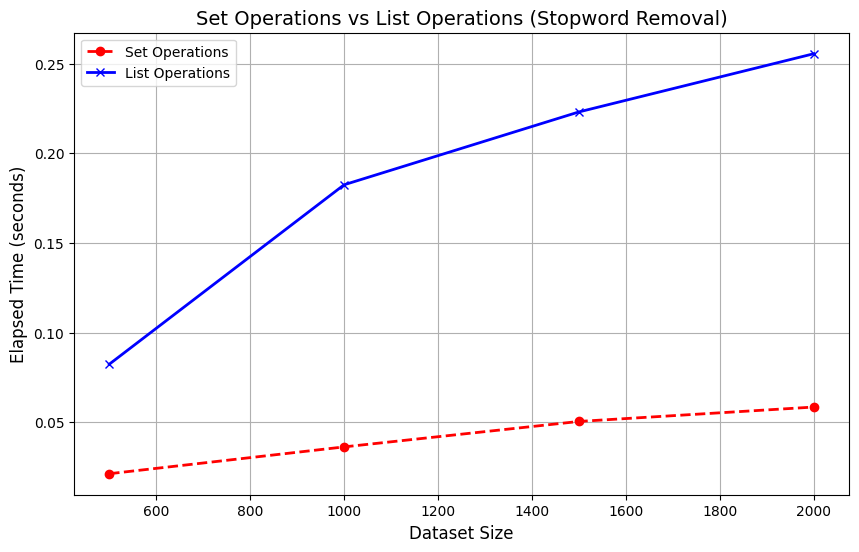

In [31]:
# Plotting the results
sizes = list(set_exp.keys())  # Dataset sizes: 500, 1000, 1500, 2000
set_times = list(set_exp.values())  # Execution times for set operations
list_times = list(list_exp.values())  # Execution times for list operations

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sizes, set_times, label="Set Operations", color="red", marker='o', linestyle='--', linewidth=2)  # Corrected label
plt.plot(sizes, list_times, label="List Operations", color="blue", marker='x', linestyle='-', linewidth=2)  # Corrected label

# Adding labels and title
plt.xlabel("Dataset Size", fontsize=12)
plt.ylabel("Elapsed Time (seconds)", fontsize=12)
plt.title("Set Operations vs List Operations (Stopword Removal)", fontsize=14)

# Adding legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


## Page 76 HandOn #2

In [32]:
def m2_elapsed_experiment_set_specify_input(cleaned_description):
    print(len(cleaned_description))
    # Replace non-alphabets with spaces and collapse spaces
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))

    # Tokenize
    tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))

    # Remove stop words
    stop_dict = set(stopwords.words())
    sw_removed_description = tokenized_description.apply(lambda s: [word for word in s if word not in stop_dict])
    sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word) > 2])

    # Create stem caches
    concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
    stem_cache = {}
    ps = PorterStemmer()
    for s in concated:
        stem_cache[s] = ps.stem(s)

    # Stem
    stemmed_description = sw_removed_description.apply(lambda s: [stem_cache[w] for w in s])

    # vertorize
    from sklearn.feature_extraction.text import CountVectorizer
    cv = CountVectorizer(analyzer=lambda s: s)
    vectorizer = cv.fit(stemmed_description)
    X = vectorizer.transform(stemmed_description)

    return X

In [33]:
import multiprocessing
import time

cleaned_description = get_and_clean_data()
core_exp = {}

for c in [1, 2, 4, 8, 12]:#for i in range(int(np.ceil(np.log(multiprocessing.cpu_count()))) + 1)]:
    # 1, 2, 4, 8
    start = time.time()
    print(c)
    parsed_description_split = np.array_split(cleaned_description, c)
    with multiprocessing.pool.ThreadPool(c) as pool:
        pool.map(m2_elapsed_experiment_set_specify_input, parsed_description_split)
    end = time.time()
    core_exp[c] = end - start

1


C:\Users\Admin\anaconda3\envs\new\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


7583
2
37923791

4
1896189618961895



8
948948948948
948948948947






12
632632632632632632632
632632

632

632631








In [34]:
core_exp

{1: 28.798036575317383,
 2: 17.362807512283325,
 4: 15.508499145507812,
 8: 15.783458709716797,
 12: 17.898036003112793}

Text(0, 0.5, 'elasped time (s)')

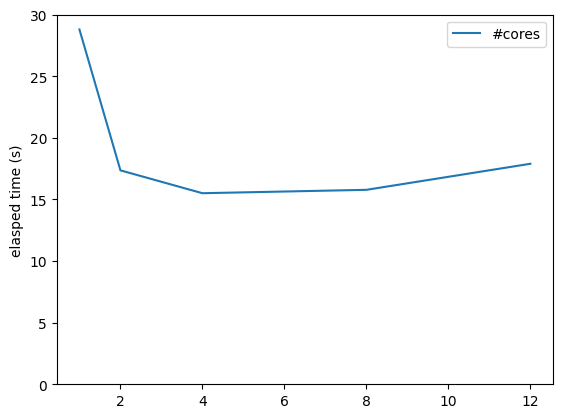

In [35]:
df = pd.DataFrame.from_dict(core_exp, orient='index', columns=['#cores'])
p = df.plot()
p.set_ylim(0, np.ceil(max(df['#cores'])) + 1)
p.set_ylabel('elasped time (s)')

Text(0, 0.5, 'speedup')

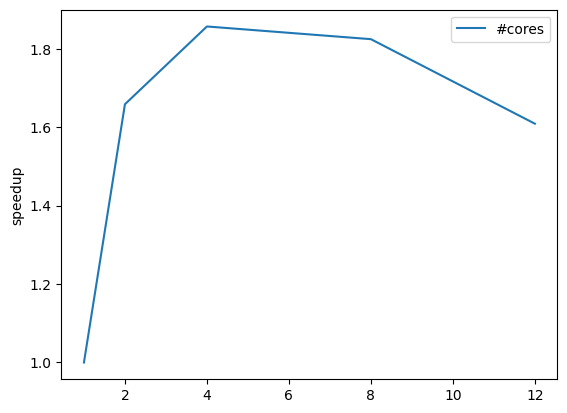

In [36]:
df = df.apply(lambda s: df.loc[1]/s, axis=1)
p = df.plot()
p.set_ylabel('speedup')

## Page 11-12 HandOn #3

In [37]:
def create_stem_cache(cleaned_description):
 tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))
 concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
 stem_cache = {}
 ps = PorterStemmer()
 for s in concated:
  stem_cache[s] = ps.stem(s)
 return stem_cache

In [38]:
from ordered_set import OrderedSet
def create_custom_preprocessor(stop_dict, stem_cache):
 def custom_preprocessor(s):
  ps = PorterStemmer()
  s = re.sub(r'[^A-Za-z]', ' ', s)
  s = re.sub(r'\s+', ' ', s)
  s = word_tokenize(s)
  s = list(OrderedSet(s) - stop_dict)
  s = [word for word in s if len(word)>2]
  s = [stem_cache[w] if w in stem_cache else ps.stem(w) for w in s]
  s = ' '.join(s)
  return s
 return custom_preprocessor

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
def sk_vectorize(texts, cleaned_description, stop_dict, stem_cache):
 my_custom_preprocessor = create_custom_preprocessor(stop_dict, stem_cache)
 vectorizer = CountVectorizer(preprocessor=my_custom_preprocessor)
 vectorizer.fit(cleaned_description)
 query = vectorizer.transform(texts)
 print(query)
 print(vectorizer.inverse_transform(query))

In [41]:
cleaned_description = get_and_clean_data()
stem_cache = create_stem_cache(cleaned_description)
stop_dict = set(stopwords.words('English'))
sk_vectorize(['python is simpler than java'], cleaned_description, stop_dict, stem_cache)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 30513)>
  Coords	Values
  (0, 13947)	1
  (0, 21383)	1
  (0, 24234)	1
[array(['java', 'python', 'simpler'], dtype='<U124')]
